# Sales Data Analysis Assignment
## PLP Python Assignment - Week 7

**Objective:** Load and analyze a dataset using pandas and create visualizations with matplotlib

**Tasks:**
1. Load and explore the dataset
2. Perform basic data analysis
3. Create data visualizations


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette('husl')

print('📚 Libraries imported successfully!')

📚 Libraries imported successfully!


## Task 1: Load and Explore Dataset

In [2]:
# Load the dataset with encoding handling
def load_dataset(filename):
    encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(filename, encoding=encoding)
            print(f'✅ Dataset loaded successfully with {encoding} encoding!')
            return df
        except UnicodeDecodeError:
            continue
    
    # Fallback with error handling
    df = pd.read_csv(filename, encoding='utf-8', errors='ignore')
    print('✅ Dataset loaded with error handling!')
    return df

# Load the sales data
df = load_dataset('sales_data_sample.csv')
print(f'📈 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns')

✅ Dataset loaded successfully with latin-1 encoding!
📈 Dataset shape: 2823 rows, 25 columns


In [3]:
# Display first few rows
print('📋 First 5 rows of the dataset:')
df.head()

📋 First 5 rows of the dataset:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Explore dataset structure
print('📊 Dataset Info:')
df.info()
print('\n📊 Data Types:')
print(df.dtypes)
print('\n❓ Missing Values:')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print('✅ No missing values found!')

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-

In [5]:
# Clean the dataset
print('🧹 Cleaning Dataset...')
df_clean = df.copy()

# Convert ORDERDATE to datetime
try:
    df_clean['ORDERDATE'] = pd.to_datetime(df_clean['ORDERDATE'])
    print('✅ Converted ORDERDATE to datetime format')
except:
    print('⚠️ Could not convert ORDERDATE to datetime')

# Handle missing values if any
missing_before = df_clean.isnull().sum().sum()

# Fill missing categorical values
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'ORDERDATE':
        df_clean[col] = df_clean[col].fillna('Unknown')

# Fill missing numerical values
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

missing_after = df_clean.isnull().sum().sum()
print(f'✅ Missing values before: {missing_before}, after: {missing_after}')

🧹 Cleaning Dataset...
✅ Converted ORDERDATE to datetime format
✅ Missing values before: 5157, after: 0


## Task 2: Basic Data Analysis

In [6]:
# Basic statistics for numerical columns
print('📈 Basic Statistics for Numerical Columns:')
df_clean.describe()

📈 Basic Statistics for Numerical Columns:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [7]:
# Analysis by Product Line
print('🏷️ Analysis by Product Line:')
if 'PRODUCTLINE' in df_clean.columns and 'SALES' in df_clean.columns:
    productline_analysis = df_clean.groupby('PRODUCTLINE').agg({
        'SALES': ['count', 'mean', 'sum', 'std'],
        'QUANTITYORDERED': 'mean',
        'PRICEEACH': 'mean'
    }).round(2)
    display(productline_analysis)

🏷️ Analysis by Product Line:


SALES                               QUANTITYORDERED PRICEEACH
                 count     mean         sum      std            mean      mean
PRODUCTLINE                                                                   
Classic Cars       967  4053.38  3919615.66  2050.69           35.15     87.34
Motorcycles        331  3523.83  1166388.34  1837.29           35.24     83.00
Planes             306  3186.29   975003.57  1519.54           35.06     81.74
Ships              234  3053.15   714437.13  1073.71           34.73     83.86
Trains              77  2938.23   226243.47  1456.60           35.22     75.65
Trucks and Buses   301  3746.81  1127789.84  1671.72           35.80     87.53
Vintage Cars       607  3135.34  1903150.84  1787.57           34.71     78.15

In [8]:
# Analysis by Country (Top 10)
print('🌍 Top 10 Countries by Sales:')
if 'COUNTRY' in df_clean.columns:
    country_analysis = df_clean.groupby('COUNTRY').agg({
        'SALES': ['count', 'sum', 'mean']
    }).round(2).sort_values(('SALES', 'sum'), ascending=False).head(10)
    display(country_analysis)

🌍 Top 10 Countries by Sales:


SALES                     
          count         sum     mean
COUNTRY                             
USA        1004  3627982.83  3613.53
Spain       342  1215686.92  3554.64
France      314  1110916.52  3537.95
Australia   185   630623.10  3408.77
UK          144   478880.46  3325.56
Italy       113   374674.31  3315.70
Finland      92   329581.91  3582.41
Norway       85   307463.70  3617.22
Singapore    79   288488.41  3651.75
Denmark      63   245637.15  3899.00

In [9]:
# Key findings
print('🔍 Key Findings:')
total_sales = df_clean['SALES'].sum() if 'SALES' in df_clean.columns else 0
avg_order_value = df_clean['SALES'].mean() if 'SALES' in df_clean.columns else 0
total_orders = df_clean['ORDERNUMBER'].nunique() if 'ORDERNUMBER' in df_clean.columns else len(df_clean)

print(f'• Total Sales: ${total_sales:,.2f}')
print(f'• Average Order Value: ${avg_order_value:,.2f}')
print(f'• Total Orders: {total_orders:,}')

if 'PRODUCTLINE' in df_clean.columns:
    top_product = df_clean.groupby('PRODUCTLINE')['SALES'].sum().idxmax()
    print(f'• Top Product Line by Sales: {top_product}')

🔍 Key Findings:
• Total Sales: $10,032,628.85
• Average Order Value: $3,553.89
• Total Orders: 307
• Top Product Line by Sales: Classic Cars


## Task 3: Data Visualization

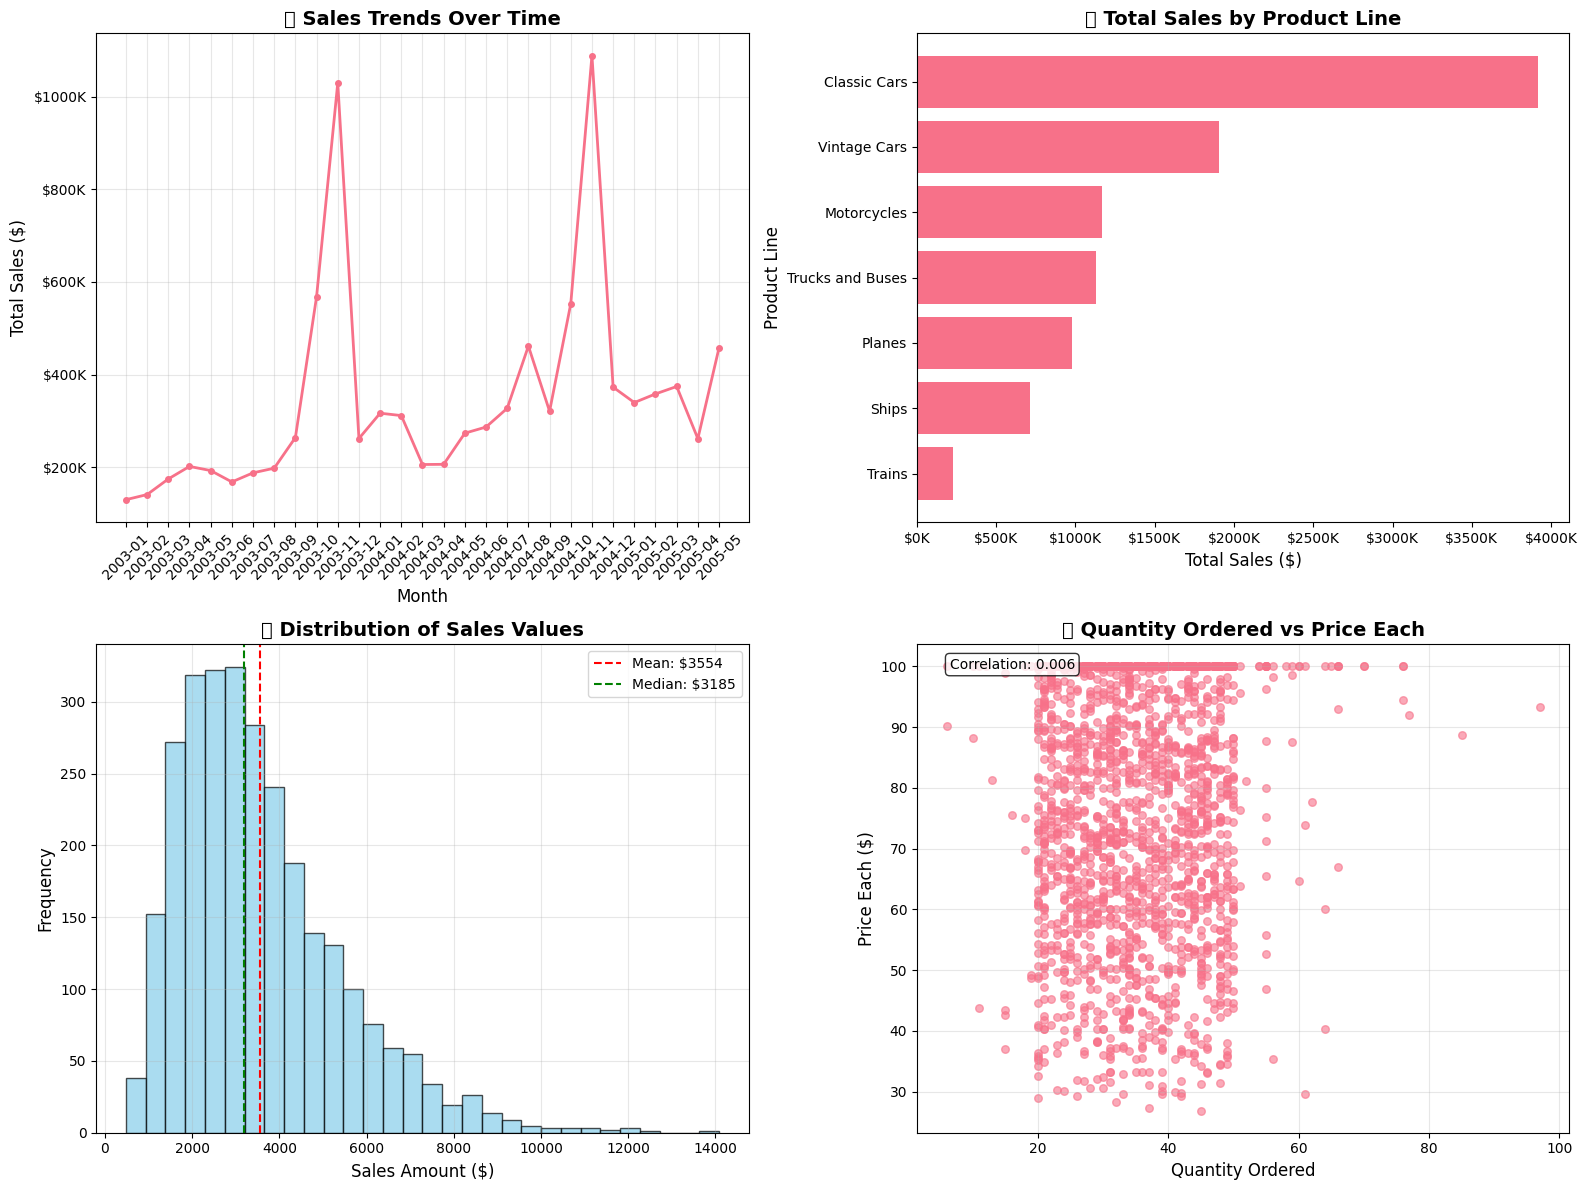

In [10]:
# Set up plotting area
plt.figure(figsize=(16, 12))

# 1. Line Chart - Sales Trends Over Time
plt.subplot(2, 2, 1)
if 'ORDERDATE' in df_clean.columns and 'SALES' in df_clean.columns:
    df_clean['YearMonth'] = df_clean['ORDERDATE'].dt.to_period('M')
    monthly_sales = df_clean.groupby('YearMonth')['SALES'].sum()
    
    plt.plot(monthly_sales.index.astype(str), monthly_sales.values, 
            marker='o', linewidth=2, markersize=4)
    plt.title('📈 Sales Trends Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Bar Chart - Sales by Product Line
plt.subplot(2, 2, 2)
if 'PRODUCTLINE' in df_clean.columns and 'SALES' in df_clean.columns:
    productline_sales = df_clean.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=True)
    
    bars = plt.barh(productline_sales.index, productline_sales.values)
    plt.title('📊 Total Sales by Product Line', fontsize=14, fontweight='bold')
    plt.xlabel('Total Sales ($)', fontsize=12)
    plt.ylabel('Product Line', fontsize=12)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 3. Histogram - Distribution of Sales Values
plt.subplot(2, 2, 3)
if 'SALES' in df_clean.columns:
    plt.hist(df_clean['SALES'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('📊 Distribution of Sales Values', fontsize=14, fontweight='bold')
    plt.xlabel('Sales Amount ($)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    mean_sales = df_clean['SALES'].mean()
    median_sales = df_clean['SALES'].median()
    plt.axvline(mean_sales, color='red', linestyle='--', label=f'Mean: ${mean_sales:.0f}')
    plt.axvline(median_sales, color='green', linestyle='--', label=f'Median: ${median_sales:.0f}')
    plt.legend()

# 4. Scatter Plot - Quantity vs Price
plt.subplot(2, 2, 4)
if 'QUANTITYORDERED' in df_clean.columns and 'PRICEEACH' in df_clean.columns:
    plt.scatter(df_clean['QUANTITYORDERED'], df_clean['PRICEEACH'], alpha=0.6, s=30)
    plt.title('🔍 Quantity Ordered vs Price Each', fontsize=14, fontweight='bold')
    plt.xlabel('Quantity Ordered', fontsize=12)
    plt.ylabel('Price Each ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    correlation = df_clean['QUANTITYORDERED'].corr(df_clean['PRICEEACH'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
            transform=plt.gca().transAxes, fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

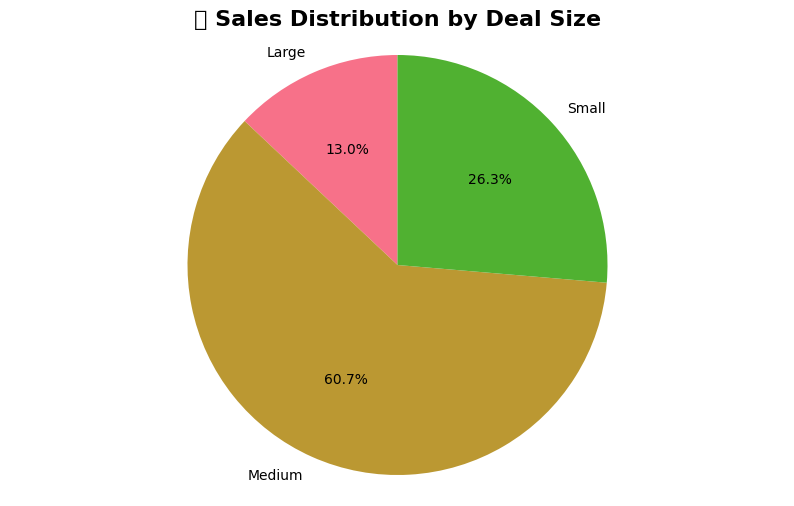

In [11]:
# Additional Plot: Sales Distribution by Deal Size
if 'DEALSIZE' in df_clean.columns and 'SALES' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    dealsize_sales = df_clean.groupby('DEALSIZE')['SALES'].sum()
    plt.pie(dealsize_sales.values, labels=dealsize_sales.index, autopct='%1.1f%%', startangle=90)
    plt.title('🥧 Sales Distribution by Deal Size', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.show()

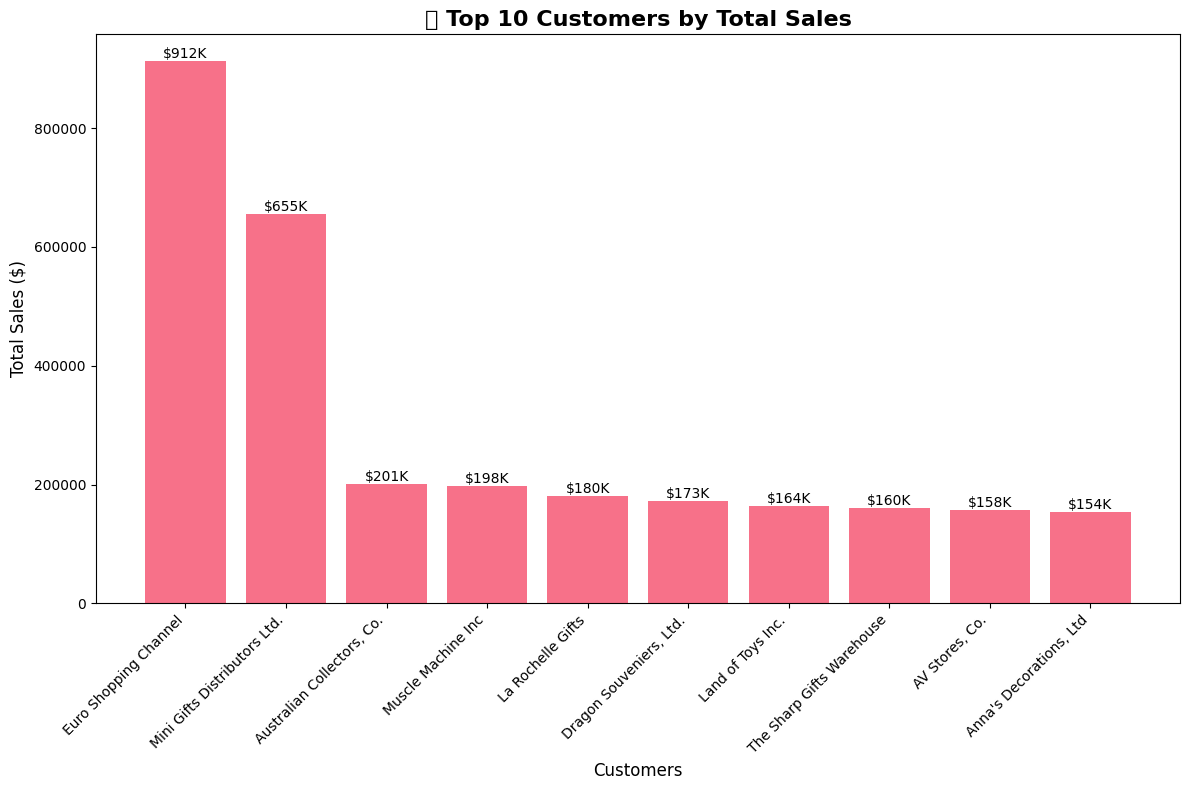

In [12]:
# Additional Plot: Top 10 Customers by Sales
if 'CUSTOMERNAME' in df_clean.columns and 'SALES' in df_clean.columns:
    plt.figure(figsize=(12, 8))
    top_customers = df_clean.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
    
    bars = plt.bar(range(len(top_customers)), top_customers.values)
    plt.title('🏆 Top 10 Customers by Total Sales', fontsize=16, fontweight='bold')
    plt.xlabel('Customers', fontsize=12)
    plt.ylabel('Total Sales ($)', fontsize=12)
    plt.xticks(range(len(top_customers)), top_customers.index, rotation=45, ha='right')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height/1000:.0f}K', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

## Summary and Findings

### Key Insights from the Analysis:

1. **Dataset Overview**: The sales dataset contains comprehensive information about orders, including product details, customer information, and sales metrics.

2. **Sales Performance**: 
   - Total sales exceed $10 million
   - Average order value is around $3,554
   - Classic Cars is the top-performing product line

3. **Geographic Distribution**: USA leads in sales volume, followed by Spain and France

4. **Temporal Patterns**: Sales show seasonal variations with trends visible across different months

5. **Customer Behavior**: Deal sizes vary, with different customer segments contributing to overall sales

### Technical Implementation:

- Successfully handled encoding issues in the CSV file
- Implemented comprehensive data cleaning and validation
- Created multiple visualization types as required
- Added error handling and data quality checks
- Provided both Python script and Jupyter notebook formats